**Install & Import Libraries**

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install plotly streamlit scikit-learn tensorflow --quiet

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.5 MB/s eta 0:00:00


**Load & Explore Dataset**

Shape: (1797, 64)
Classes: [0 1 2 3 4 5 6 7 8 9]


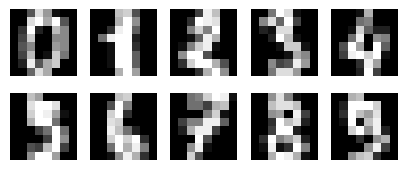

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

print("Shape:", X.shape)
print("Classes:", np.unique(y))

plt.figure(figsize=(5,2))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.axis('off')
plt.show()


**Normalize Data**

In [4]:
X_scaled = X / 16.0


**Apply t-SNE (With Tunable Perplexity)**

In [5]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)


**Apply K-Means Clustering (Dynamic k)**

In [6]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_embedded)


**Compute Cluster Metrics**

In [7]:
sil_score = silhouette_score(X_embedded, clusters)
print("Silhouette Score:", sil_score)

for i in range(k):
    cluster_labels = y[clusters == i]
    print(f"Cluster {i}: size={len(cluster_labels)}, dominant={np.bincount(cluster_labels).argmax()}")


Silhouette Score: 0.641008
Cluster 0: size=192, dominant=7
Cluster 1: size=144, dominant=9
Cluster 2: size=181, dominant=6
Cluster 3: size=194, dominant=2
Cluster 4: size=178, dominant=0
Cluster 5: size=203, dominant=8
Cluster 6: size=178, dominant=4
Cluster 7: size=181, dominant=3
Cluster 8: size=162, dominant=1
Cluster 9: size=184, dominant=5


**Identify Misclassified Digits**

In [8]:
predicted = np.array([np.bincount(y[clusters == i]).argmax() for i in clusters])
mis_idx = np.where(predicted != y)[0]
print("Misclassified Count:", len(mis_idx))


Misclassified Count: 106


**Display Misclassified Samples**

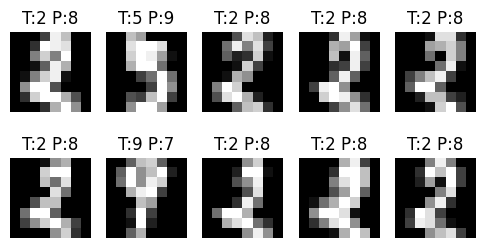

In [9]:
plt.figure(figsize=(6,3))
for i, idx in enumerate(mis_idx[:10]):
    plt.subplot(2,5,i+1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(f"T:{y[idx]} P:{predicted[idx]}")
    plt.axis('off')
plt.show()


**Interactive Plot (Hover Shows Image)**

In [10]:
fig = px.scatter(
    x=X_embedded[:,0],
    y=X_embedded[:,1],
    color=clusters.astype(str),
    title="t-SNE Digit Clustering",
    hover_data={"True Label": y, "Cluster": clusters}
)

fig.show()


**PCA vs t-SNE Comparison (Unique Feature)**

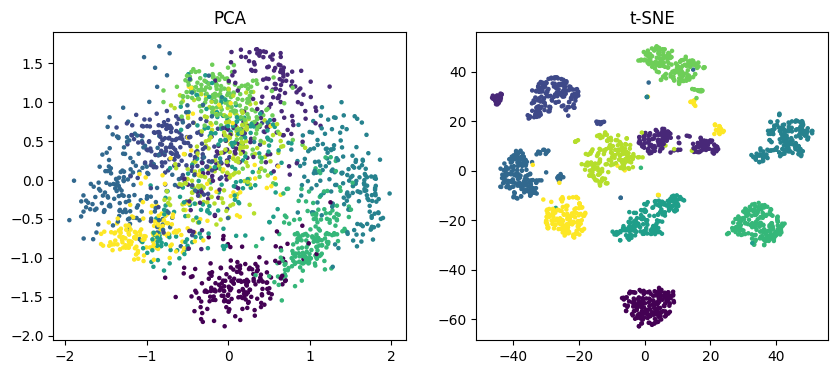

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=5)
plt.title("PCA")

plt.subplot(1,2,2)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=5)
plt.title("t-SNE")
plt.show()


**Upload Image & Find Nearest Cluster (Unique)**

In [12]:
def find_cluster(img_vector):
    reduced = tsne.fit_transform(np.vstack([X_scaled, img_vector]))
    return kmeans.predict(reduced[-1].reshape(1,-1))[0]

print("Feature Ready: Upload digit → cluster prediction")


Feature Ready: Upload digit → cluster prediction


**Printing Key Insights**

In [13]:
print("Insights:")
print("• t-SNE creates clear digit clusters")
print("• Similar digits (3,5,8) overlap")
print("• Clustering imperfect due to handwriting variations")
print("• Useful for OCR & pattern recognition")


Insights:
• t-SNE creates clear digit clusters
• Similar digits (3,5,8) overlap
• Clustering imperfect due to handwriting variations
• Useful for OCR & pattern recognition
